In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(
    "tmp/sarsa_rs/sarsa_rs/sweep_results.csv",
    names=["alpha", "gamma", "epsilon", "mean_reward"],
)

In [3]:
df.head()

,alpha,gamma,epsilon,mean_reward
0,alpha,gamma,epsilon,mean_reward
1,3.14891165e-05,0.2388351230992,0.069555269581,"[9.0, 8.0, 8.0, 9.0, 8.0, 9.0, 6.0, 9.0, 9.0, ..."
2,5.4152441e-06,0.6445490763029,0.7959171633234,"[20.0, 20.0, 30.0, 2.0, 1.0, 3.0, 6.0, 30.0, 3..."
3,0.000269264691,0.8194736398237,0.1659363231025,"[7.0, 8.0, 6.0, 7.0, 8.0, 9.0, 8.0, 7.0, 7.0, ..."
4,0.0004467752818,0.9629303187105,0.925780523272,"[4.0, 0.0, 2.0, 20.0, 20.0, 5.0, 6.0, 1.0, 31...."


In [4]:
df = df.drop(index=0)

In [5]:
# convert string to array
df["mean_reward"] = df["mean_reward"].apply(
    lambda x: [float(i) for i in x.strip("[]").split(",")]
)
df.head()

,alpha,gamma,epsilon,mean_reward
1,3.14891165e-05,0.2388351230992,0.069555269581,"[9.0, 8.0, 8.0, 9.0, 8.0, 9.0, 6.0, 9.0, 9.0, ..."
2,5.4152441e-06,0.6445490763029,0.7959171633234,"[20.0, 20.0, 30.0, 2.0, 1.0, 3.0, 6.0, 30.0, 3..."
3,0.000269264691,0.8194736398237,0.1659363231025,"[7.0, 8.0, 6.0, 7.0, 8.0, 9.0, 8.0, 7.0, 7.0, ..."
4,0.0004467752818,0.9629303187105,0.925780523272,"[4.0, 0.0, 2.0, 20.0, 20.0, 5.0, 6.0, 1.0, 31...."
5,3.5868165e-05,0.5829995140108,0.7836325308318,"[1.0, 2.0, 4.0, 11.0, 40.0, 21.0, 7.0, 0.0, 20..."


In [6]:
# go through the list and get the mean
df["mean_reward"] = df["mean_reward"].apply(lambda x: sum(x) / len(x))
df.head()

,alpha,gamma,epsilon,mean_reward
1,3.14891165e-05,0.2388351230992,0.069555269581,8.64
2,5.4152441e-06,0.6445490763029,0.7959171633234,30.45
3,0.000269264691,0.8194736398237,0.1659363231025,13.04
4,0.0004467752818,0.9629303187105,0.925780523272,21.26
5,3.5868165e-05,0.5829995140108,0.7836325308318,28.41


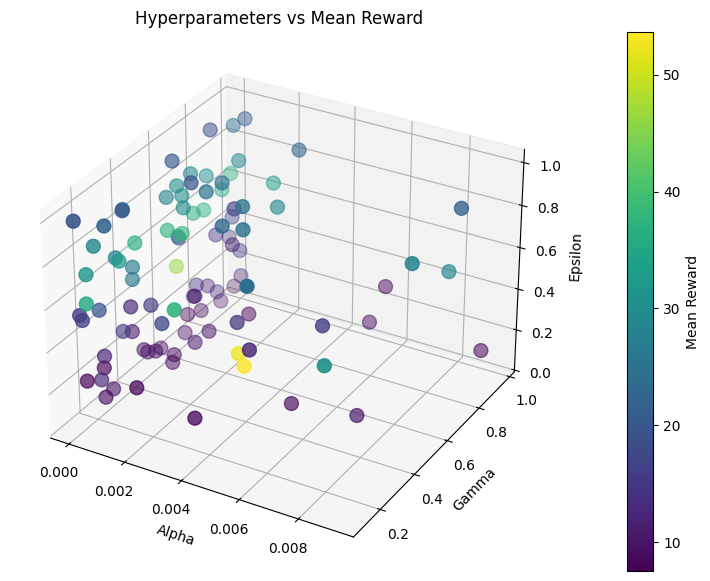

In [12]:
# Ensure all columns are numeric
df = df.apply(pd.to_numeric)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    df["alpha"].values,
    df["gamma"].values,
    df["epsilon"].values,
    c=df["mean_reward"].values,
    cmap="viridis",
    s=100,
)

ax.set_xlabel("Alpha")
ax.set_ylabel("Gamma")
ax.set_zlabel("Epsilon")
plt.title("Hyperparameters vs Mean Reward")
cb = plt.colorbar(sc, pad=0.1)
cb.set_label("Mean Reward")
plt.show()

1. 
* as you can see the result of the rewards between the different choices of hyperparameters is much difference so this suggests that hyperparameter tuning led to a notable enhancement in learning efficiency and final performance.

2. 
* Lower learning rate (e.g., 0.001):
    * Slower initial progress.
    * May require more training steps to converge.
    * Risk of getting stuck in local minima or plateauing early.
* Higher learning rate (e.g., 0.01):
    * Faster initial learning.
    * Risk of instability or overshooting optimal solutions.
    * May cause noisy or diverging training.

* Best performance is achieved with a moderate learning rate (lr=0.001), which balances fast learning and stability.
3. 
* the best is when we have more exploitation rather than exploration between 0.05 and 0.1